# Question 2

Perform 5 data visualization tasks on the student performance dataset given in the link below (create
5 different visualizations). Explain what kind analysis has become easier with each of the visualizations.
Create the folder structure for this question similar to question 1. (15 points)

The 5 visualization I will be creating are:
1. A scatter plot of the relationship between test preparation course and math score
2. A histogram of the distribution of math scores
3. A box plot of the relationship between test preparation course and math score
4. A KDE plot of the distribution of math scores
5. A heatmap of the correlation between all the variables
6. A hexbin plot of the relationship between test preparation course and math score

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Step 1. Import and Clean Data

The dataset was provided as part of the assignment, so I do not have information on how it was collected. However, the dataset is clean and does not have any missing values. The dataset contains 1000 rows and 7 columns. 

The columns are as follows:
- `gender`: Listed as `male` or `female`
- `race/ethnicity`: Listed as `group A`, `group B`, `group C`, or `group D`
- `parental level of education`: Listed as `some high school`, `high school`, `some college`, `associate's degree`, `bachelor's degree`, or `master's degree`
- `lunch`: Either `standard` or `free/reduced`
- `test preparation course`: Either `none` or `completed`
- `math score`: Numerical value between 0 and 100
- `reading score`: Numerical value between 0 and 100
- `writing score`: Numerical value between 0 and 100

In [4]:
df = pd.read_csv('data/question_2.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 2. Create Visualizations

**Visualization 1: Scatter Plot**

<Axes: xlabel='math score', ylabel='test preparation course'>

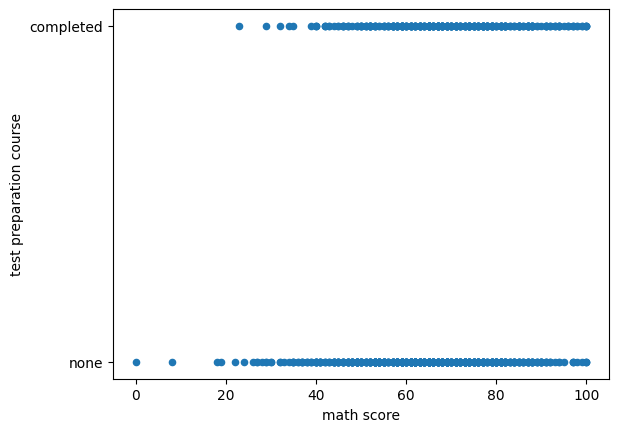

In [5]:
df.plot(x='math score', y='test preparation course', kind='scatter')